# Project_02 : Johnson-Lindenstrauss Lemma

In [7]:
print(__doc__)

import sys
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.random_projection import johnson_lindenstrauss_min_dim  # minimal number of dimensions(components)
from sklearn.random_projection import SparseRandomProjection         # Reduce dimensionality through "Sparse random projection."
from sklearn.random_projection import GaussianRandomProjection       # Reduce dimensionality through "Gaussian random projection."
from sklearn.metrics.pairwise import euclidean_distances             #

Automatically created module for IPython interactive environment


# Experiment 1 : n_samples vs n_components

<Figure size 432x288 with 0 Axes>

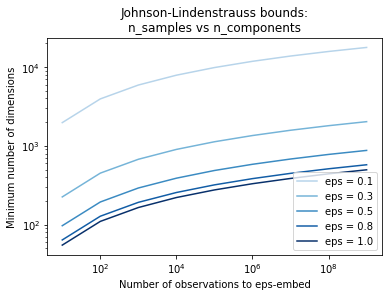

<Figure size 432x288 with 0 Axes>

In [8]:
# range of admissible distortions
eps_range = np.linspace(0.1, 0.99, 5)
colors = plt.cm.Blues(np.linspace(0.3, 1.0, len(eps_range)))

# range of number of samples (observation) to embed
n_samples_range = np.logspace(1, 9, 9)

plt.figure()
for eps, color in zip(eps_range, colors):
    min_n_components = johnson_lindenstrauss_min_dim(n_samples_range, eps=eps) # minimal number of dimensions(components)
    plt.loglog(n_samples_range, min_n_components, color=color)

plt.legend(["eps = %0.1f" % eps for eps in eps_range], loc="lower right")
plt.xlabel("Number of observations to eps-embed")
plt.ylabel("Minimum number of dimensions")
plt.title("Johnson-Lindenstrauss bounds:\nn_samples vs n_components")

# range of admissible distortions
eps_range = np.linspace(0.01, 0.99, 100)

# range of number of samples (observation) to embed
n_samples_range = np.logspace(2, 6, 5)
colors = plt.cm.Blues(np.linspace(0.3, 1.0, len(n_samples_range)))

plt.figure()

# Experiment 2 : Gaussian Random Projection

Embedding 500 samples with dim 130107 using various random projections
Projected 500 samples from 130107 to 300 in 1.747s
Mean distances rate: 0.99 (0.08)
Projected 500 samples from 130107 to 1000 in 7.546s
Mean distances rate: 1.01 (0.05)


MemoryError: 

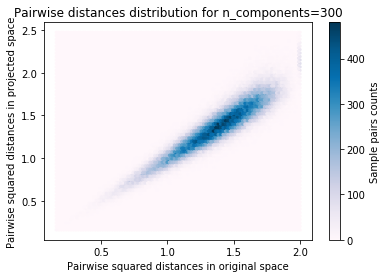

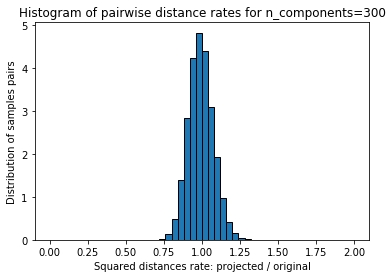

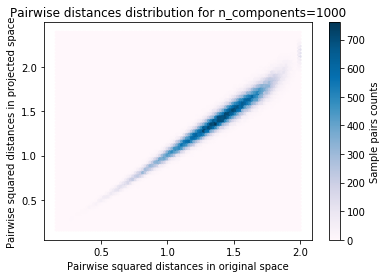

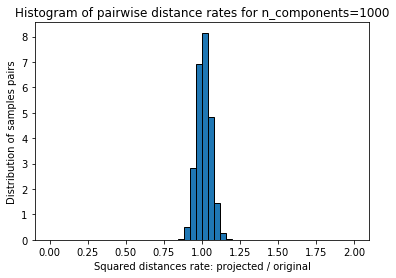

In [13]:
#load fetch_20newsgroups_vectorized Data
from sklearn.datasets import fetch_20newsgroups_vectorized
data = fetch_20newsgroups_vectorized().data[:500]

n_samples, n_features = data.shape
print("Embedding %d samples with dim %d using various random projections"
      % (n_samples, n_features))

n_components_range = np.array([300, 1000, 10000])
dists = euclidean_distances(data, squared=True).ravel() # use Euclidean distance (The distance of each node in the "original data")

# select only non-identical samples pairs
nonzero = dists != 0
dists = dists[nonzero]

for n_components in n_components_range:
    t0 = time()
    rp = GaussianRandomProjection(n_components=n_components) # Reduce dimensionality through "Gaussian Random Projection"
    projected_data = rp.fit_transform(data) # Fit to data, then transform it.
    print("Projected %d samples from %d to %d in %0.3fs"
          % (n_samples, n_features, n_components, time() - t0))
    
    # use Euclidean distance (The distance of each node after dimensionality reduction)
    projected_dists = euclidean_distances(projected_data, squared=True).ravel()[nonzero]

    plt.figure()
    plt.hexbin(dists, projected_dists, gridsize=100, cmap=plt.cm.PuBu)
    plt.xlabel("Pairwise squared distances in original space")
    plt.ylabel("Pairwise squared distances in projected space")
    plt.title("Pairwise distances distribution for n_components=%d" %
              n_components)
    cb = plt.colorbar()
    cb.set_label('Sample pairs counts')

    rates = projected_dists / dists 
    print("Mean distances rate: %0.2f (%0.2f)"
          % (np.mean(rates), np.std(rates)))

    plt.figure()
    plt.hist(rates, bins=50, density=True, range=(0., 2.), edgecolor='k')
    plt.xlabel("Squared distances rate: projected / original")
    plt.ylabel("Distribution of samples pairs")
    plt.title("Histogram of pairwise distance rates for n_components=%d" %
              n_components)

plt.show()

# Experiment 3 : Sparse Random Projection
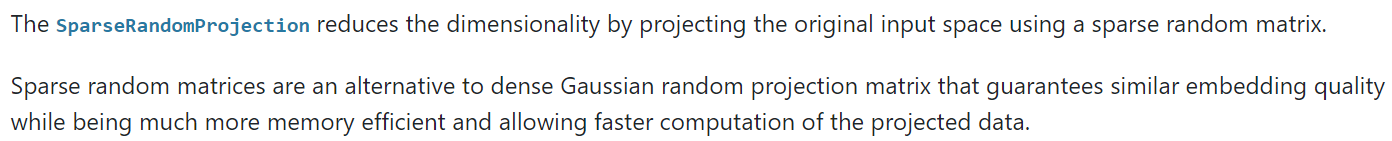

Embedding 500 samples with dim 130107 using various random projections
Projected 500 samples from 130107 to 300 in 0.246s
Mean distances rate: 1.03 (0.19)
Projected 500 samples from 130107 to 1000 in 0.712s
Mean distances rate: 0.96 (0.09)
Projected 500 samples from 130107 to 10000 in 6.526s
Mean distances rate: 1.00 (0.03)


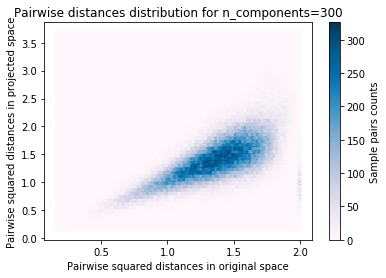

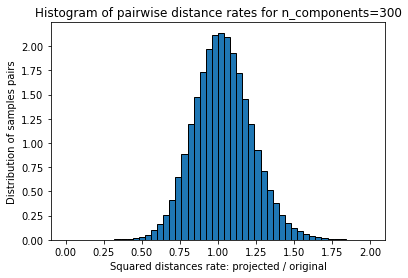

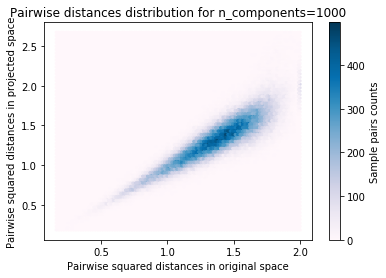

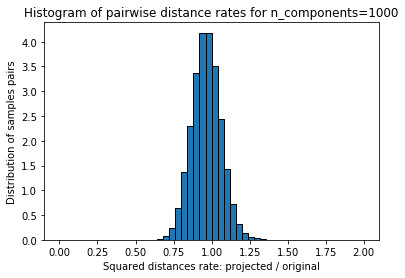

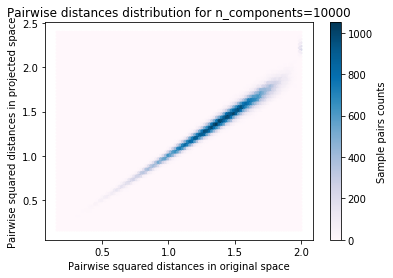

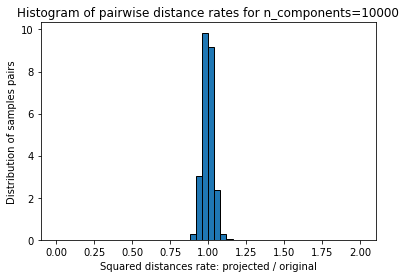

In [11]:
#load fetch_20newsgroups_vectorized Data
from sklearn.datasets import fetch_20newsgroups_vectorized
data = fetch_20newsgroups_vectorized().data[:500]

n_samples, n_features = data.shape
print("Embedding %d samples with dim %d using various random projections"
      % (n_samples, n_features))

n_components_range = np.array([300, 1000, 10000])
dists = euclidean_distances(data, squared=True).ravel() # use Euclidean distance (The distance of each node in the original data)

# select only non-identical samples pairs
nonzero = dists != 0
dists = dists[nonzero]

for n_components in n_components_range:
    t0 = time()
    rp = SparseRandomProjection(n_components=n_components) # Reduce dimensionality through " Sparse Random Projection".
    projected_data = rp.fit_transform(data) # Fit to data, then transform it.
    print("Projected %d samples from %d to %d in %0.3fs"
          % (n_samples, n_features, n_components, time() - t0))
    
    # use Euclidean distance (The distance of each node after dimensionality reduction)
    projected_dists = euclidean_distances(projected_data, squared=True).ravel()[nonzero]

    plt.figure()
    plt.hexbin(dists, projected_dists, gridsize=100, cmap=plt.cm.PuBu)
    plt.xlabel("Pairwise squared distances in original space")
    plt.ylabel("Pairwise squared distances in projected space")
    plt.title("Pairwise distances distribution for n_components=%d" %
              n_components)
    cb = plt.colorbar()
    cb.set_label('Sample pairs counts')

    rates = projected_dists / dists 
    print("Mean distances rate: %0.2f (%0.2f)"
          % (np.mean(rates), np.std(rates)))

    plt.figure()
    plt.hist(rates, bins=50, density=True, range=(0., 2.), edgecolor='k')
    plt.xlabel("Squared distances rate: projected / original")
    plt.ylabel("Distribution of samples pairs")
    plt.title("Histogram of pairwise distance rates for n_components=%d" %
              n_components)

plt.show()